In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('online_retail_co_ecommerce.csv', index_col=0)

In [3]:
# ratings
df['rating'] = df['average_review_rating'].apply(lambda x: x if type(x)==float else float(x[:3])) # if not nan return first three characters 

In [4]:
# price
def transform_price(x):
    if type(x) == float: # if price is nan return itself
        return x
    if '-' in x: # if price is range return nan
        return np.nan
    return float(x.replace('£','').replace(',','')) # remove £ and , return float
df['price_1'] = df['price'].apply(lambda x: transform_price(x))

In [5]:
# categories
df['category_and_sub_category'] = df['category_and_sub_category'].str.split(' > ') # spplit category using ' > ' return a list

def category(x):
    if type(x)==float: # if nan return list with 5 nan
        return [np.nan,np.nan,np.nan,np.nan,np.nan]
    else: # return all the categories (if not 5, nan)
        return x+[np.nan]*(5-len(x))
        
for i in range(5):
    df['category_'+str(i+1)] = df['category_and_sub_category'].apply(lambda x: category(x)[i])

In [6]:
# number of reviews
df['number_of_reviews'] = df['number_of_reviews'].apply(lambda x: float(x.replace(',','')) if type(x) == str else x) # return nan or float

# in stock number
df['in_stock_num'] = df['number_available_in_stock'].apply(lambda x: float(x.split('\xa0')[0]) if type(x)!=float else x) 

# in stock type (all types????)
df['in_stock_type'] = df['number_available_in_stock'].apply(lambda x: x.split('\xa0')[1] if type(x)!=float else x)

In [7]:
df.iloc[9021]['customer_reviews'] = "Backstop!! // 5.0 // 6 Feb. 2014 // By\n    \n    Leigh RybakRajewski\n  \n on 6 Feb. 2014 // I never had a rhino Transformer but always wanted one that was not too big.In beast mode he look's really nice, with the cyber key inserted the horn extend's which is better made of use in this mode.In robot mode he look's cool but slightly odd, though his squat stature does suit him."

/var/folders/jb/bxbmc2q970l2l1j4xlhcq9980000gn/T/ipykernel_17470/2849234294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[9021]['customer_reviews'] = "Backstop!! // 5.0 // 6 Feb. 2014 // By\n    \n    Leigh RybakRajewski\n  \n on 6 Feb. 2014 // I never had a rhino Transformer but always wanted one that was not too big.In beast mode he look's really nice, with the cyber key inserted the horn extend's which is better made of use in this mode.In robot mode he look's cool but slightly odd, though his squat stature does suit him."


In [8]:
# reviews as a new dataset
def transform_review(review):
    if type(review) == float:
        return review
    l = review.split(' | ')
    for i in range(len(l)):
        l[i] = l[i].split(' // ')
    return l

df['customer_reviews_transform'] = df['customer_reviews'].apply(lambda x: transform_review(x)) 

In [9]:
def transform_review_tol(x):
    title, rating, review_date, customer, review, review_1, review_2, review_3, review_4, review_5 = [], [], [], [], [],[], [], [], [], []
    if x==x:
        for a in x:
            if len(a)==5:
                title.append(a[0])                                                                                  
                rating.append(float(a[1]))
                review_date.append(a[2])
                customer.append(a[3])
                review.append(a[4])
                if float(a[1])==1.:
                    review_1.append(a[4])
                if float(a[1])==2.:
                    review_2.append(a[4])
                if float(a[1])==3.:
                    review_3.append(a[4])
                if float(a[1])==4.:
                    review_4.append(a[4])
                if float(a[1])==5.:
                    review_5.append(a[4])
    return [title, rating, review_date, customer, review, review_1, review_2, review_3, review_4, review_5]

In [10]:
df[['title', 'review_rating', 'review_date', 'customer', 'review', 'review_1', 'review_2', 'review_3', 'review_4', 'review_5']] = df.apply(lambda x: transform_review_tol(x['customer_reviews_transform']),axis=1, result_type="expand") 

In [11]:
df['number_of_1_star'] = df['review_1'].str.len()
df['number_of_2_star'] = df['review_2'].str.len()
df['number_of_3_star'] = df['review_3'].str.len()
df['number_of_4_star'] = df['review_4'].str.len()
df['number_of_5_star'] = df['review_5'].str.len()

In [12]:
df['review'] = df['review'].apply(lambda x: ' '.join(map(str, x)))
df['review_1'] = df['review_1'].apply(lambda x: ' '.join(map(str, x)))
df['review_2'] = df['review_2'].apply(lambda x: ' '.join(map(str, x)))
df['review_3'] = df['review_3'].apply(lambda x: ' '.join(map(str, x)))
df['review_4'] = df['review_4'].apply(lambda x: ' '.join(map(str, x)))
df['review_5'] = df['review_5'].apply(lambda x: ' '.join(map(str, x)))

In [24]:
# EDA-counts, lengths, sentence counts, string counts, average word length, average sentence lengths

import numpy as np
import nltk
from nltk.tokenize import sent_tokenize

# # Character counts
# df['char_count'] = df['review_content'].map(lambda x: len(x))
for a in ['review', 'review_1', 'review_2', 'review_3', 'review_4', 'review_5']:
    # Word counts
    df[a+'_word_count'] = df[a].map(lambda x: len(x.split()))
    # Sentence counts
    df[a+'_sent_count'] = df[a].map(lambda x: len(sent_tokenize(x)))
    # Average word length
    df[a+'_avg_word_len'] = df[a].map(lambda x: np.mean([len(w) for w in str(x).split()]))
    # Average sentence length
    df[a+'_avg_sent_len'] = df[a].map(lambda x: np.mean([len(w.split()) for w in sent_tokenize(x)]))

/Users/may/opt/miniconda3/envs/mlenv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/may/opt/miniconda3/envs/mlenv/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/may/opt/miniconda3/envs/mlenv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/may/opt/miniconda3/envs/mlenv/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/may/opt/miniconda3/envs/mlenv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/may/opt/miniconda3/envs/mlenv/lib/python3.9/site-packages/

In [178]:
df.to_csv('review_1.csv')

In [387]:
df.isnull().sum().sort_values(ascending = True)

uniq_id                                           0
review_date                                       0
customer                                          0
review                                            0
review_2                                          0
review_3                                          0
review_4                                          0
review_5                                          0
number_of_1_star                                  0
number_of_2_star                                  0
number_of_3_star                                  0
number_of_4_star                                  0
review_rating                                     0
number_of_5_star                                  0
review_sent_count                                 0
review_1_word_count                               0
review_1_sent_count                               0
review_2_word_count                               0
review_2_sent_count                               0
review_3_wor

In [13]:
df.drop(['category_3','review_4_avg_sent_len','review_4_avg_word_len', 'category_4', 'review_3_avg_word_len', 'review_3_avg_sent_len',
'customer_questions_and_answers', 'review_2_avg_sent_len', 'review_2_avg_word_len', 'review_1_avg_sent_len', 'review_1_avg_word_len',
'category_5'], inplace=True, axis=1)

In [389]:
numeric_var1 = df.columns[df.dtypes != 'object']
quantitative = df[numeric_var1]
categorical_var = df.columns[df.dtypes == 'object']
categorical = df[categorical_var]

/var/folders/jb/bxbmc2q970l2l1j4xlhcq9980000gn/T/ipykernel_86546/991982921.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_correlations, dtype=np.bool)


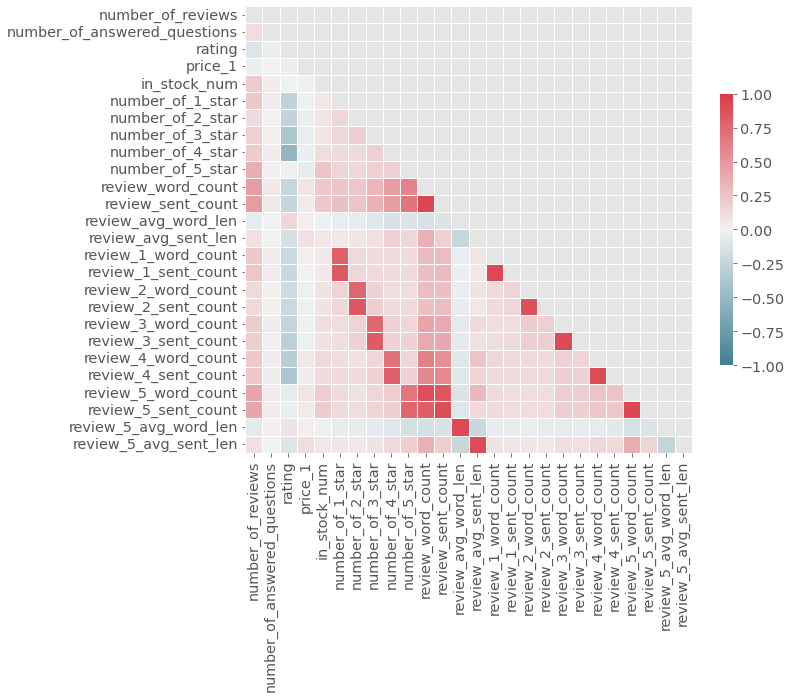

In [390]:
df_correlations = quantitative.corr()
#mask the upper half for visualization purposes
mask = np.zeros_like(df_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize= (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_correlations,mask=mask,  vmax=1, vmin=-1, cmap=cmap,
            center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [391]:
corr = quantitative.corr()
pos_cor = corr['price_1'] >0
neg_cor = corr['price_1'] <0
corr['price_1'][pos_cor].sort_values(ascending = False)

price_1                         1.000000
review_5_avg_sent_len           0.110181
review_avg_sent_len             0.097214
review_word_count               0.072752
review_5_word_count             0.072276
review_4_word_count             0.061242
review_5_sent_count             0.042080
review_sent_count               0.038181
review_4_sent_count             0.026435
rating                          0.025260
review_1_word_count             0.020082
review_5_avg_word_len           0.018154
review_avg_word_len             0.017239
review_1_sent_count             0.007044
number_of_answered_questions    0.004163
Name: price_1, dtype: float64

In [392]:
corr['price_1'][neg_cor].sort_values(ascending = False)

review_3_word_count   -0.011644
number_of_1_star      -0.012809
review_2_word_count   -0.016532
in_stock_num          -0.018077
review_3_sent_count   -0.020662
review_2_sent_count   -0.022476
number_of_reviews     -0.024191
number_of_2_star      -0.032276
number_of_4_star      -0.035836
number_of_3_star      -0.045195
number_of_5_star      -0.048406
Name: price_1, dtype: float64

In [393]:
corr = quantitative.corr()
pos_cor = corr['rating'] >0
neg_cor = corr['rating'] <0
corr['rating'][pos_cor].sort_values(ascending = False)

rating                   1.000000
review_avg_word_len      0.147525
review_5_avg_word_len    0.085643
price_1                  0.025260
number_of_5_star         0.023302
in_stock_num             0.007594
Name: rating, dtype: float64

In [394]:
corr['rating'][neg_cor].sort_values(ascending = False)

number_of_answered_questions   -0.025733
review_5_sent_count            -0.035196
review_5_word_count            -0.051464
number_of_reviews              -0.111232
review_5_avg_sent_len          -0.111295
review_avg_sent_len            -0.153608
review_2_word_count            -0.189407
review_1_word_count            -0.204048
review_2_sent_count            -0.213635
review_1_sent_count            -0.221874
review_word_count              -0.240802
review_sent_count              -0.245708
review_3_word_count            -0.250318
number_of_2_star               -0.258616
number_of_1_star               -0.268316
review_3_sent_count            -0.289065
review_4_word_count            -0.316894
number_of_3_star               -0.368775
review_4_sent_count            -0.382052
number_of_4_star               -0.522777
Name: rating, dtype: float64

In [395]:
df.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price', 'number_available_in_stock', 'number_of_reviews', 'number_of_answered_questions', 'average_review_rating', 'category_and_sub_category', 'customers_who_bought_this_item_also_bought', 'description', 'product_information', 'product_description', 'items_customers_buy_after_viewing_this_item', 'customer_reviews', 'sellers', 'rating', 'price_1', 'category_1', 'category_2', 'in_stock_num', 'in_stock_type', 'customer_reviews_transform', 'title', 'review_rating', 'review_date', 'customer', 'review', 'review_1', 'review_2', 'review_3', 'review_4', 'review_5', 'number_of_1_star', 'number_of_2_star', 'number_of_3_star', 'number_of_4_star', 'number_of_5_star', 'review_word_count', 'review_sent_count', 'review_avg_word_len', 'review_avg_sent_len', 'review_1_word_count', 'review_1_sent_count', 'review_2_word_count', 'review_2_sent_count', 'review_3_word_count', 'review_3_sent_count', 'review_4_word_count', 'review_4_sent_count',
       'revie

/var/folders/jb/bxbmc2q970l2l1j4xlhcq9980000gn/T/ipykernel_86546/2637487090.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)


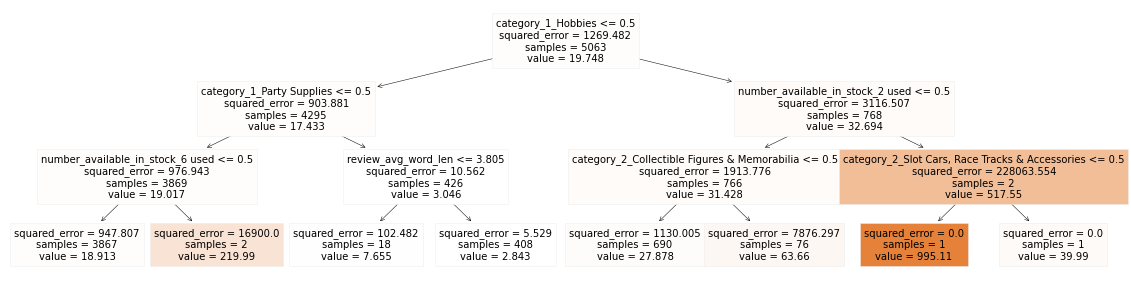

In [396]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

data = df[['number_available_in_stock', 'number_of_reviews', 'number_of_answered_questions', 'average_review_rating',
 'rating', 'price_1', 'category_1', 'category_2', 'in_stock_num', 'in_stock_type',
 'number_of_1_star', 'number_of_2_star', 'number_of_3_star', 'number_of_4_star', 'number_of_5_star', 
 'review_word_count', 'review_sent_count', 'review_avg_word_len', 'review_avg_sent_len', 'review_1_word_count', 'review_1_sent_count', 'review_2_word_count', 'review_2_sent_count', 'review_3_word_count', 'review_3_sent_count', 'review_4_word_count', 'review_4_sent_count',
       'review_5_word_count', 'review_5_sent_count', 'review_5_avg_word_len', 'review_5_avg_sent_len']]
data.dropna(inplace = True)

# define X and y
X = pd.get_dummies(data[['number_available_in_stock', 'number_of_reviews', 'number_of_answered_questions', 'average_review_rating',
 'rating', 'category_1', 'category_2', 'in_stock_num', 'in_stock_type',
 'number_of_1_star', 'number_of_2_star', 'number_of_3_star', 'number_of_4_star', 'number_of_5_star', 
 'review_word_count', 'review_sent_count', 'review_avg_word_len', 'review_avg_sent_len', 'review_1_word_count', 'review_1_sent_count', 'review_2_word_count', 'review_2_sent_count', 'review_3_word_count', 'review_3_sent_count', 'review_4_word_count', 'review_4_sent_count',
       'review_5_word_count', 'review_5_sent_count', 'review_5_avg_word_len', 'review_5_avg_sent_len']])

y = data['price_1'].to_numpy()
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(X, y)


fig = plt.figure(figsize=(20,5))
_ = tree.plot_tree(model, feature_names=X.columns, filled=True, fontsize=10)

In [397]:
model.score(X, y, sample_weight=None)

0.20941837633975935

/var/folders/jb/bxbmc2q970l2l1j4xlhcq9980000gn/T/ipykernel_86546/2985077562.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)


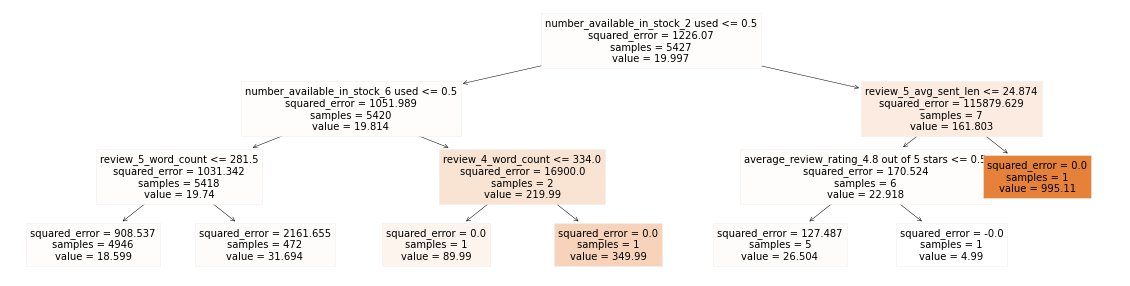

In [398]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

data = df[['number_available_in_stock', 'number_of_reviews', 'number_of_answered_questions', 'average_review_rating',
 'rating', 'price_1', 'in_stock_num', 'in_stock_type',
 'number_of_1_star', 'number_of_2_star', 'number_of_3_star', 'number_of_4_star', 'number_of_5_star', 
 'review_word_count', 'review_sent_count', 'review_avg_word_len', 'review_avg_sent_len', 'review_1_word_count', 'review_1_sent_count', 'review_2_word_count', 'review_2_sent_count', 'review_3_word_count', 'review_3_sent_count', 'review_4_word_count', 'review_4_sent_count',
       'review_5_word_count', 'review_5_sent_count', 'review_5_avg_word_len', 'review_5_avg_sent_len']]
data.dropna(inplace = True)

# define X and y
X = pd.get_dummies(data[['number_available_in_stock', 'number_of_reviews', 'number_of_answered_questions', 'average_review_rating',
 'rating', 'in_stock_num', 'in_stock_type',
 'number_of_1_star', 'number_of_2_star', 'number_of_3_star', 'number_of_4_star', 'number_of_5_star', 
 'review_word_count', 'review_sent_count', 'review_avg_word_len', 'review_avg_sent_len', 'review_1_word_count', 'review_1_sent_count', 'review_2_word_count', 'review_2_sent_count', 'review_3_word_count', 'review_3_sent_count', 'review_4_word_count', 'review_4_sent_count',
       'review_5_word_count', 'review_5_sent_count', 'review_5_avg_word_len', 'review_5_avg_sent_len']])

y = data['price_1'].to_numpy()
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(X, y)


fig = plt.figure(figsize=(20,5))
_ = tree.plot_tree(model, feature_names=X.columns, filled=True, fontsize=10)

In [399]:
model.score(X, y, sample_weight=None)

0.17122640905708963

In [400]:
corr = data[].corr()
pos_cor = corr['rating'] >0
neg_cor = corr['rating'] <0
corr['price_1'].sort_values(ascending = False)

SyntaxError: invalid syntax (3476584113.py, line 1)

In [401]:
df['category_1'].value_counts()

Hobbies                             1464
Die-Cast & Toy Vehicles             1221
Figures & Playsets                  1111
Characters & Brands                  960
Games                                941
Arts & Crafts                        802
Party Supplies                       694
Fancy Dress                          585
Sports Toys & Outdoor                372
Dolls & Accessories                  371
Jigsaws & Puzzles                    274
Puppets & Puppet Theatres            269
Baby & Toddler Toys                  106
Pretend Play                          45
Musical Toy Instruments               19
Novelty & Special Use                 11
Pens, Pencils & Writing Supplies       7
Office Supplies                        6
Electronic Toys                        5
Home Accessories                       5
Cooking & Dining                       4
Bags                                   4
Women                                  3
Educational Toys                       3
Worlds Apart    

In [402]:
top_5_categories = ['Hobbies', 'Die-Cast & Toy Vehicles', 'Figures & Playsets', 'Characters & Brands','Games']
top_10_categories = ['Hobbies', 'Die-Cast & Toy Vehicles', 'Figures & Playsets', 'Characters & Brands','Games', 'Arts & Crafts', 'Party Supplies', 'Fancy Dress', 'Sports Toys & Outdoor','Dolls & Accessories']

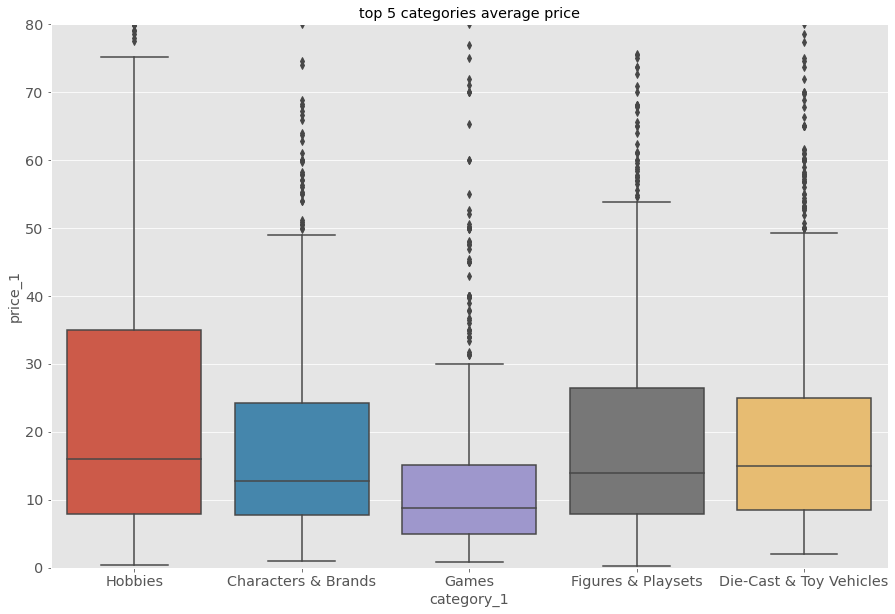

In [403]:
plt.figure(figsize=(15,10))
sns.boxplot(data = df[df.category_1.isin(top_categories)], x = 'category_1', y = 'price_1')
plt.title('top 5 categories average price')
plt.ylim(0,80)
plt.show()

In [404]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

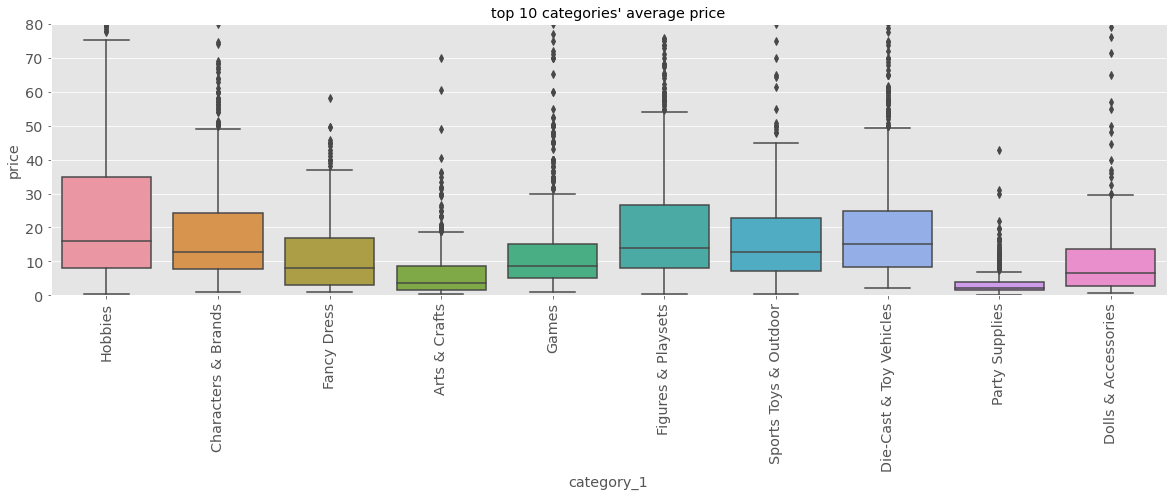

In [405]:
# plt.figure(figsize=(25,10))
sns.boxplot(data = df[df.category_1.isin(top_10_categories)], x = 'category_1', y = 'price_1')
plt.title('top 10 categories\' average price')
plt.ylim(0,80)
plt.xticks(rotation=90)
plt.xlabel('category_1')
plt.ylabel('price')
plt.show()

In [406]:
df[df.category_1=='Hobbies'].price_1.max()

2439.92

In [410]:
sns.histplot(ax=ax[0],data = df, x='price_1')
plt.show()

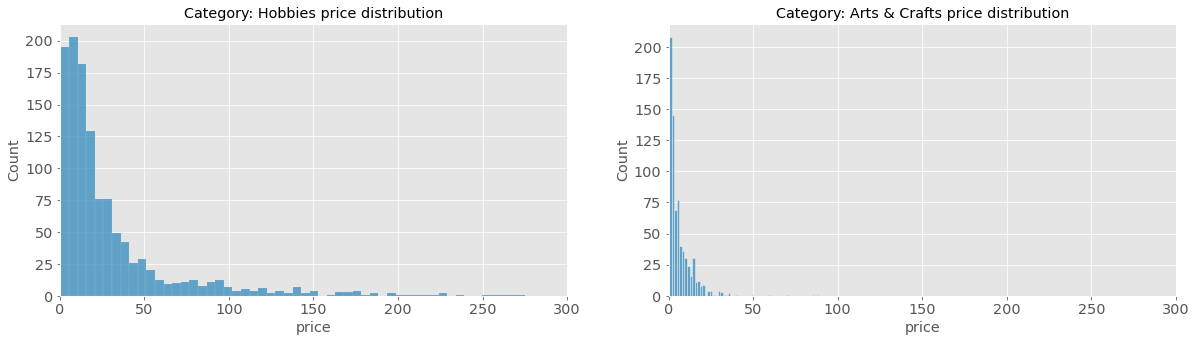

In [407]:
fig, ax = plt.subplots(ncols=2, nrows=1)
sns.histplot(ax=ax[0],data = df[df.category_1=='Hobbies'], x='price_1')
ax[0].set_xlim(0,300)
ax[0].set_xlabel('price')
ax[0].set_title('Category: Hobbies price distribution')
sns.histplot(ax=ax[1], data = df[df.category_1=='Arts & Crafts'], x='price_1')
ax[1].set_xlim(0,300)
ax[1].set_xlabel('price')
ax[1].set_title('Category: Arts & Crafts price distribution')
plt.show()

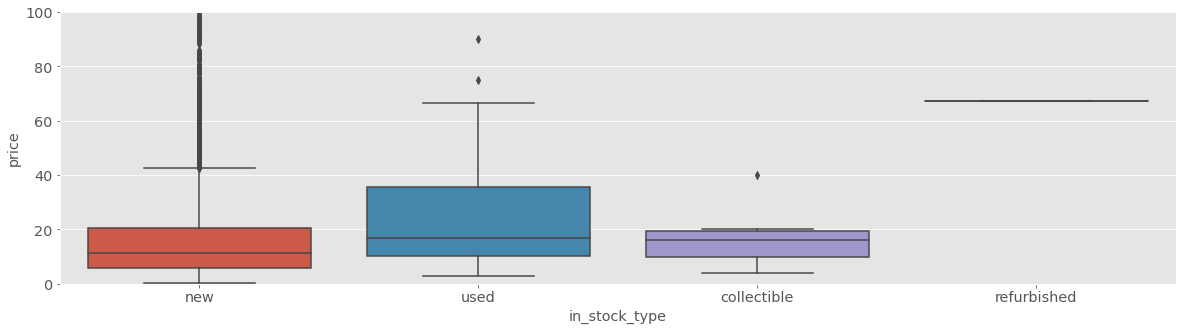

In [420]:
# plt.figure(figsize=(20,6))
sns.boxplot(data = df, x = 'in_stock_type', y = 'price_1')
plt.ylabel('price')
plt.ylim(0,100)
plt.show()

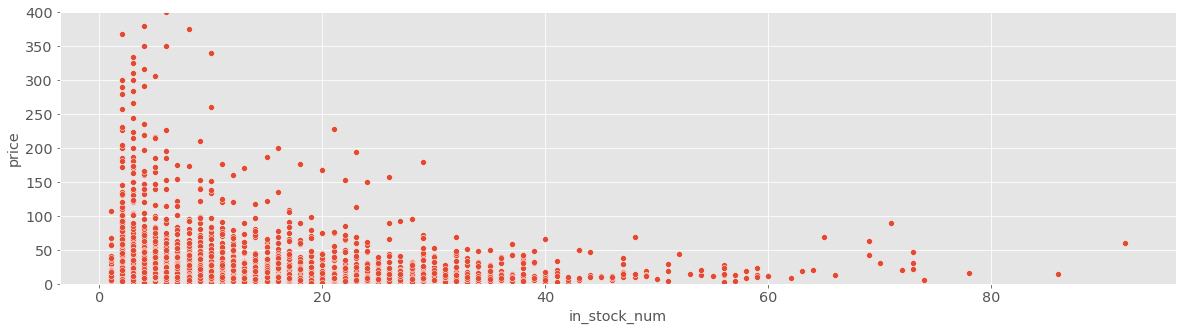

In [419]:
# plt.figure(figsize=(20,6))
sns.scatterplot(data = df, x = 'in_stock_num', y = 'price_1')
plt.ylabel('price')
plt.ylim(0,400)
plt.show()

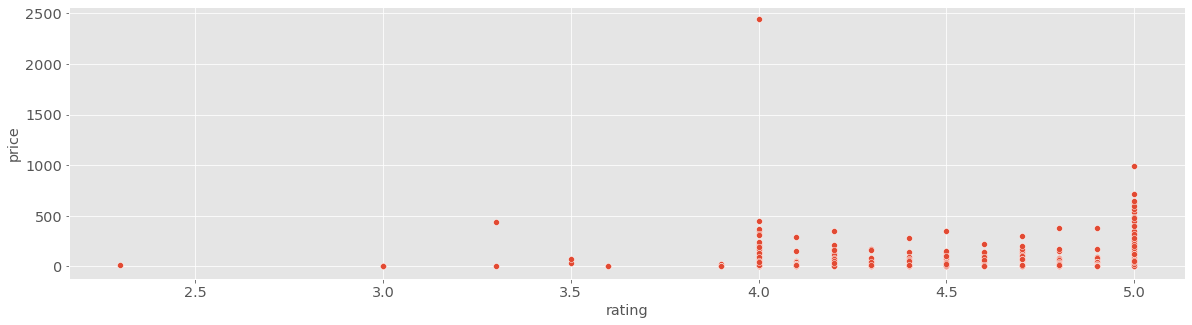

In [ ]:
# plt.figure(figsize=(20,6))
sns.scatterplot(data = df, x = 'rating', y = 'price_1')
plt.ylabel('price')
# plt.ylim(0,400)
plt.show()

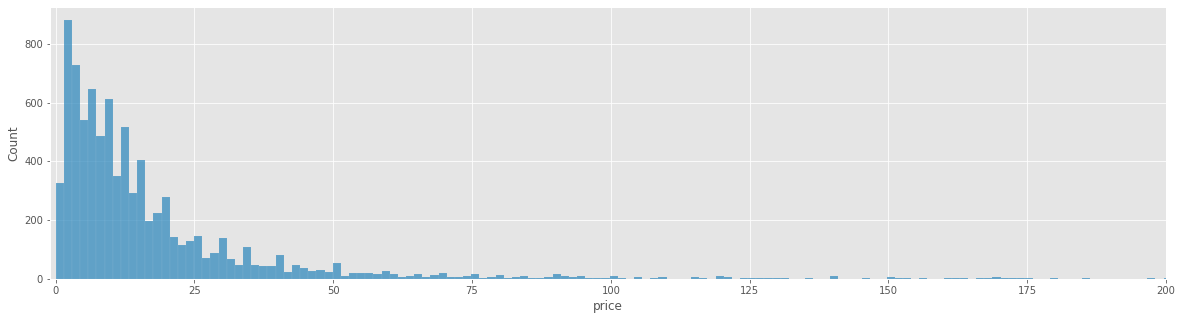

In [17]:
plt.figure(figsize=(20,5))
sns.histplot(data = df, x='price_1')
plt.xlim(-1,200)
plt.xlabel('price')
plt.show()

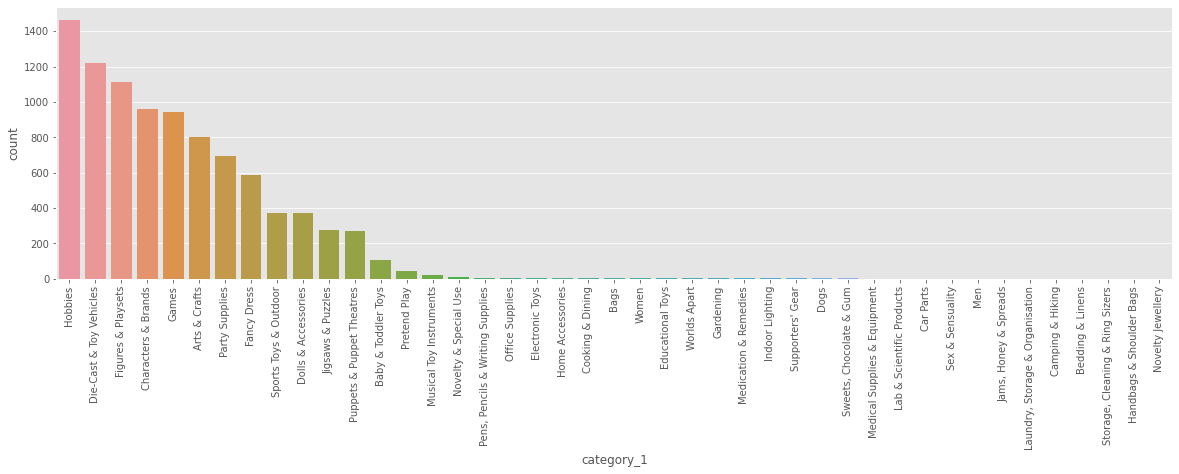

In [23]:
plt.figure(figsize=(20,5))
sns.countplot(data = df, x='category_1', order = df['category_1'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(data = df, x='category_1', order = df['category_1'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 54 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10000 non-null  object 
 1   product_name                                 10000 non-null  object 
 2   manufacturer                                 9993 non-null   object 
 3   price                                        8565 non-null   object 
 4   number_available_in_stock                    7500 non-null   object 
 5   number_of_reviews                            9982 non-null   float64
 6   number_of_answered_questions                 9235 non-null   float64
 7   average_review_rating                        9982 non-null   object 
 8   category_and_sub_category                    9310 non-null   object 
 9   customers_who_bought_this_item_also_bought   8938 non-null   object 
 10 

In [ ]:
'review_5_sent_count', 'review_5_word_count','product_name', 'review_4_sent_count', 'review_4_word_count', 'review_3_sent_count',
                  'review_3_word_count', 'review_2_sent_count', 'review_2_word_count','review_1_sent_count','review_1_word_count','category_and_sub_category',
                  'customer','review_date', 'product_information','product_description', 'description','category_1','category_2','category_3','category_4','category_and_sub_category','number_of_answered_questions','review_5_avg_word_len','review_5','review_5_avg_sent_len','customers_who_bought_this_item_also_bought','sellers','items_customers_buy_after_viewing_this_item'

In [26]:
df[[]].describe()

,number_of_reviews,number_of_answered_questions,rating,price_1,in_stock_num,number_of_1_star,number_of_2_star,number_of_3_star,number_of_4_star,number_of_5_star,review_word_count,review_sent_count,review_avg_word_len,review_avg_sent_len,review_1_word_count,review_1_sent_count,review_2_word_count,review_2_sent_count,review_3_word_count,review_3_sent_count,review_4_word_count,review_4_sent_count,review_5_word_count,review_5_sent_count,review_5_avg_word_len,review_5_avg_sent_len
count,9982.000000,9235.000000,9982.000000,8547.000000,7500.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9978.000000,9978.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,9130.000000,9130.000000
mean,9.139952,1.834976,4.707283,20.251406,7.916933,0.060900,0.05560,0.161800,0.517800,2.157200,114.827300,6.613700,4.617681,14.836180,3.094700,0.190500,3.100800,0.162700,7.868900,0.4202,24.471900,1.320300,76.291000,4.690200,4.671204,14.079932
std,33.728145,2.517268,0.372279,46.314450,8.805777,0.295973,0.25635,0.454798,0.811264,1.800003,172.111116,8.190054,0.858340,11.494717,19.375141,1.122201,19.076861,0.889555,31.009996,1.4633,62.105791,2.788886,124.815413,6.185907,0.913243,11.474391
min,1.000000,1.000000,2.300000,0.010000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,4.500000,4.990000,3.000000,0.000000,0.00000,0.000000,0.000000,1.000000,13.000000,1.000000,4.201607,7.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,7.000000,1.000000,4.210885,6.750000
50%,2.000000,1.000000,5.000000,10.560000,5.000000,0.000000,0.00000,0.000000,0.000000,1.000000,43.000000,3.000000,4.451613,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,28.000000,2.000000,4.500000,12.000000
75%,6.000000,2.000000,5.000000,19.990000,10.000000,0.000000,0.00000,0.000000,1.000000,3.000000,137.000000,8.000000,4.805556,19.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,21.000000,1.000000,87.000000,6.000000,4.881166,18.321815
max,1399.000000,39.000000,5.000000,2439.920000,92.000000,4.000000,3.00000,5.000000,6.000000,8.000000,1261.000000,61.000000,19.836879,170.000000,532.000000,23.000000,582.000000,15.000000,617.000000,32.0000,903.000000,35.000000,1197.000000,59.000000,19.836879,169.000000


In [27]:
df.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price', 'number_available_in_stock', 'number_of_reviews', 'number_of_answered_questions', 'average_review_rating', 'category_and_sub_category', 'customers_who_bought_this_item_also_bought', 'description', 'product_information', 'product_description', 'items_customers_buy_after_viewing_this_item', 'customer_reviews', 'sellers', 'rating', 'price_1', 'category_1', 'category_2', 'in_stock_num', 'in_stock_type', 'customer_reviews_transform', 'title', 'review_rating', 'review_date', 'customer', 'review', 'review_1', 'review_2', 'review_3', 'review_4', 'review_5', 'number_of_1_star', 'number_of_2_star', 'number_of_3_star', 'number_of_4_star', 'number_of_5_star', 'review_word_count', 'review_sent_count', 'review_avg_word_len', 'review_avg_sent_len', 'review_1_word_count', 'review_1_sent_count', 'review_2_word_count', 'review_2_sent_count', 'review_3_word_count', 'review_3_sent_count', 'review_4_word_count', 'review_4_sent_count',
       'revie

In [52]:
df[df.number_of_reviews!=df.number_of_1_star+df.number_of_2_star+df.number_of_3_star+df.number_of_4_star+df.number_of_5_star][[ 'number_of_reviews','number_of_1_star', 'number_of_2_star', 'number_of_3_star', 'number_of_4_star', 'number_of_5_star']]

,number_of_reviews,number_of_1_star,number_of_2_star,number_of_3_star,number_of_4_star,number_of_5_star
0,15.0,0,0,0,1,7
2,17.0,2,0,1,1,4
7,36.0,1,0,0,0,7
9,8.0,0,0,0,2,2
25,21.0,0,1,0,2,5
...,...,...,...,...,...,...
9965,10.0,0,0,0,0,5
9968,18.0,0,0,0,0,8
9985,12.0,0,0,1,0,5
9991,7.0,1,0,0,2,1


In [55]:
len(df.iloc[0]['customer_reviews'].split(' | '))

8

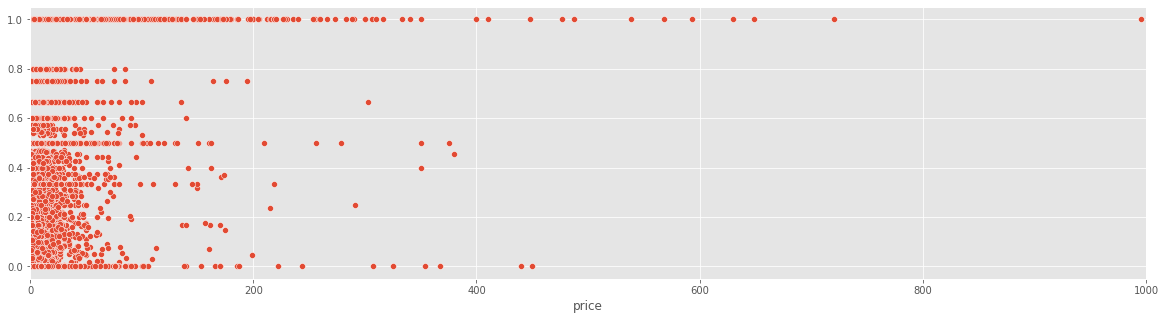

In [66]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=df, x = 'price_1', y=df['number_of_5_star']/df['number_of_reviews'])
plt.xlim(0,1000)
plt.xlabel('price')
plt.show()

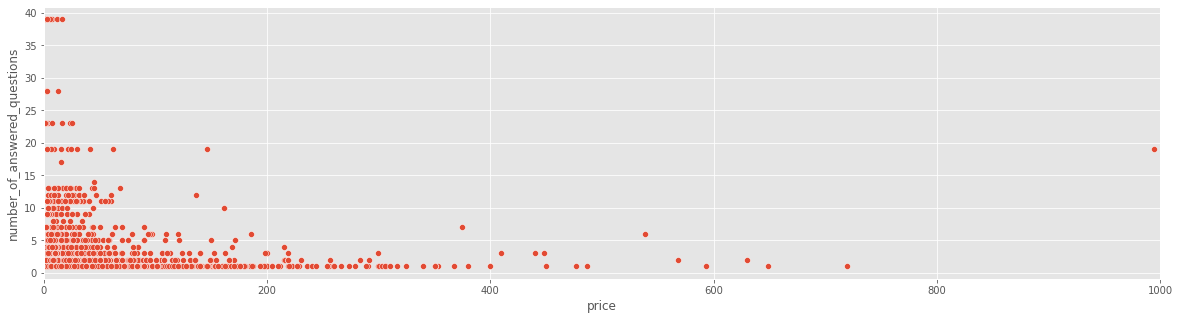

In [63]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=df, x = 'price_1', y='number_of_answered_questions')
plt.xlim(0,1000)
plt.xlabel('price')
plt.show()

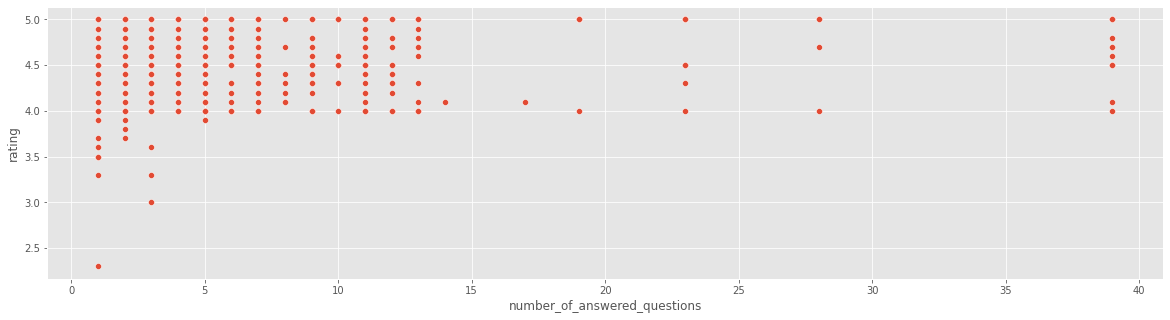

In [68]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=df, x = 'number_of_answered_questions', y='rating')
plt.show()

In [71]:
numeric_var1 = df.columns[df.dtypes != 'object']
categorical_var = df.columns[df.dtypes == 'object']

In [72]:
numeric_var1

Index(['number_of_reviews', 'number_of_answered_questions', 'rating', 'price_1', 'in_stock_num', 'number_of_1_star', 'number_of_2_star', 'number_of_3_star', 'number_of_4_star', 'number_of_5_star', 'review_word_count', 'review_sent_count', 'review_avg_word_len', 'review_avg_sent_len', 'review_1_word_count', 'review_1_sent_count', 'review_2_word_count', 'review_2_sent_count', 'review_3_word_count', 'review_3_sent_count', 'review_4_word_count', 'review_4_sent_count', 'review_5_word_count', 'review_5_sent_count', 'review_5_avg_word_len', 'review_5_avg_sent_len'], dtype='object')

In [73]:
categorical_var

Index(['uniq_id', 'product_name', 'manufacturer', 'price', 'number_available_in_stock', 'average_review_rating', 'category_and_sub_category', 'customers_who_bought_this_item_also_bought', 'description', 'product_information', 'product_description', 'items_customers_buy_after_viewing_this_item', 'customer_reviews', 'sellers', 'category_1', 'category_2', 'in_stock_type', 'customer_reviews_transform', 'title', 'review_rating', 'review_date', 'customer', 'review', 'review_1', 'review_2', 'review_3', 'review_4', 'review_5'], dtype='object')

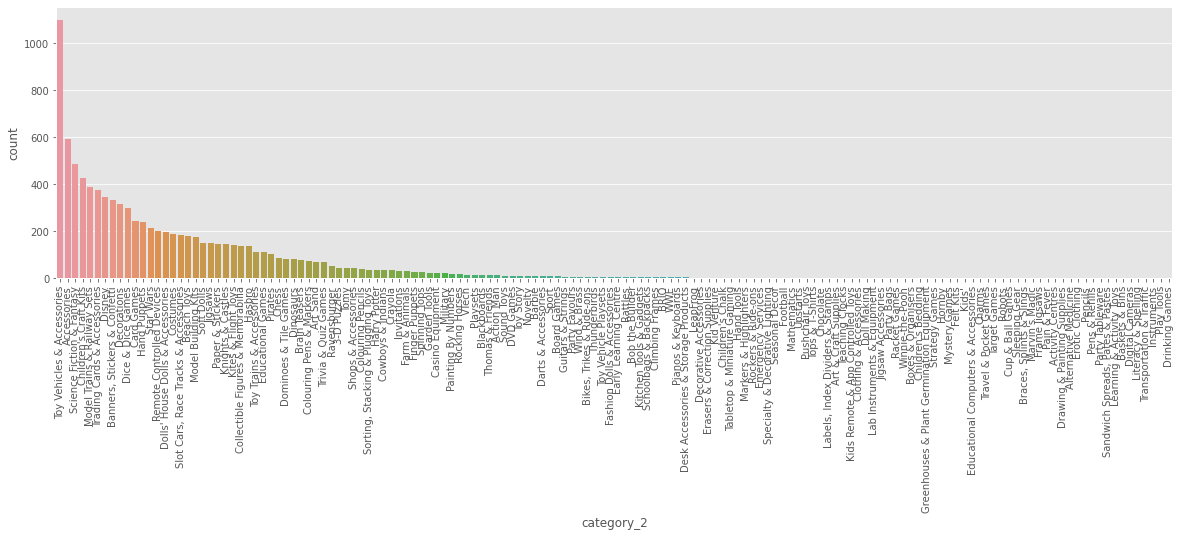

In [28]:
plt.figure(figsize=(20,5))
sns.countplot(data = df, x='category_2', order = df['category_2'].value_counts().index)
plt.xticks(rotation=90)
plt.show()